In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install dask.dataframe
!pip install "dask[dataframe]"

In [ ]:
!git clone https://<token>@github.com/big-data-lab-umbc/multivariate-weather-data-clustering.git

In [5]:
%cd multivariate-weather-data-clustering

/content/multivariate-weather-data-clustering


In [ ]:
!python setup.py install

In [7]:
import netCDF4
import netCDF4 as nc
import pandas as pd
import numpy as np
import xarray as xr
import datetime
import datetime as dt
from netCDF4 import date2num,num2date
from math import sqrt
from sklearn import preprocessing
from statistics import mean
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

from mwdc.preprocessing import *
from mwdc.visualization.visualization import visualization
from mwdc.evaluation.st_evaluation import *
from mwdc.clustering.st_agglomerative import *

import warnings
warnings.filterwarnings("ignore")

In [ ]:
path2 = ('/content/drive/MyDrive/Data/ERA5_meteo_sfc_2021_daily.nc')
#path2 = ('/content/drive/MyDrive/Data/ERA5_meteo_sfc_2021_daily_smalldomain.nc')
#path2 = ('/content/drive/MyDrive/Data/ERA5_meteo_sfc_2021_hourly.nc')
#path2 = ('/content/drive/MyDrive/Data/ERA5_meteo_sfc_2021_hourly_smalldomain.nc')
data = xr.open_dataset(path2, decode_times=False) #To view the date as integers of 0, 1, 2,....
#data = xr.open_dataset(path2)# decode_times=False) #To view the date as integers of 0, 1, 2,....
#data5 = xr.open_dataset(path2) # To view time in datetime format
data

In [10]:
var = list(data.variables)
var = var[3:]
var

['sp', 'sst', 'u10', 'v10', 'sshf', 'slhf', 't2m']

0    359
3      1
4      1
6      1
5      1
1      1
2      1
Name: Cluster, dtype: int64


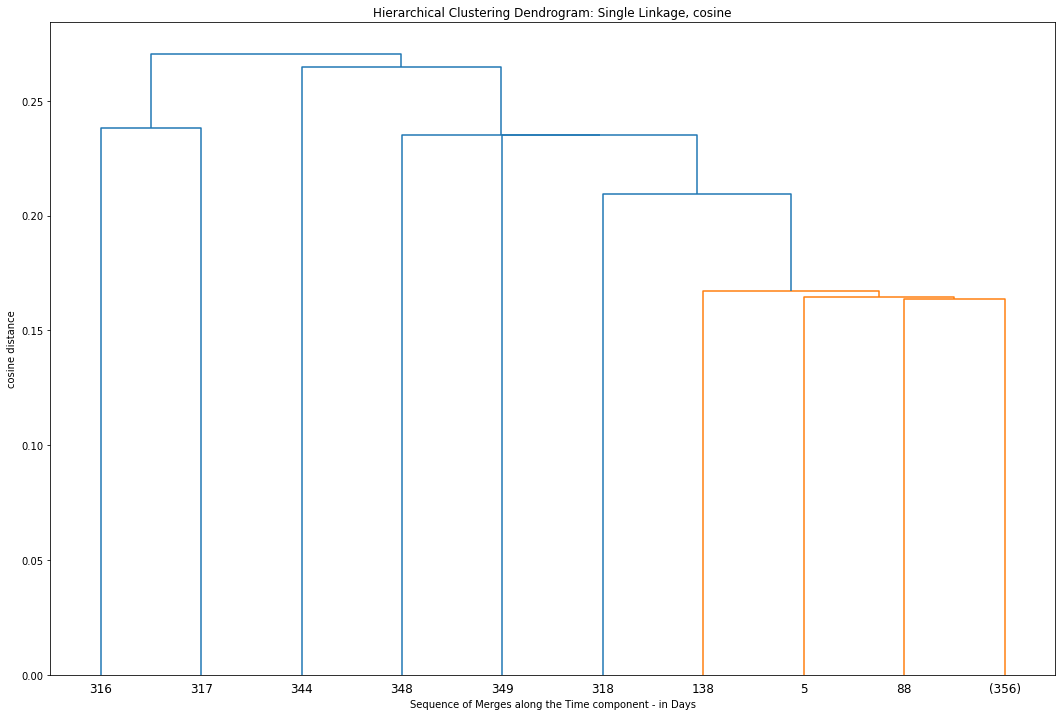

2    155
0    111
1     41
6     31
3     13
5      7
4      7
Name: Cluster, dtype: int64


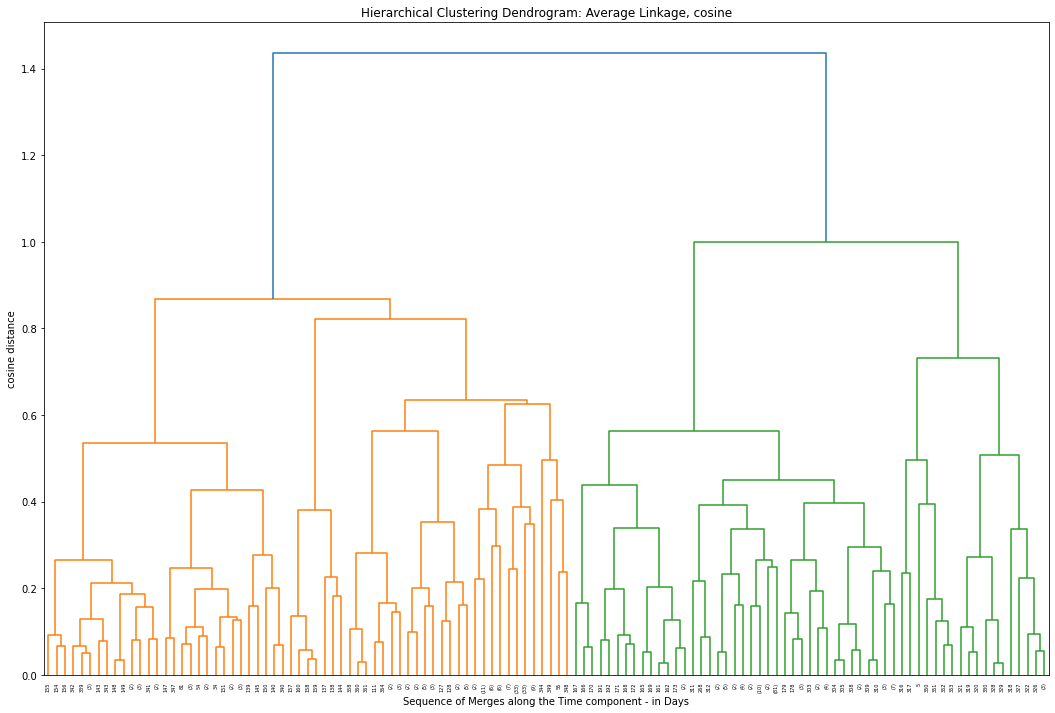

5    136
2     97
3     39
0     34
6     31
1     15
4     13
Name: Cluster, dtype: int64


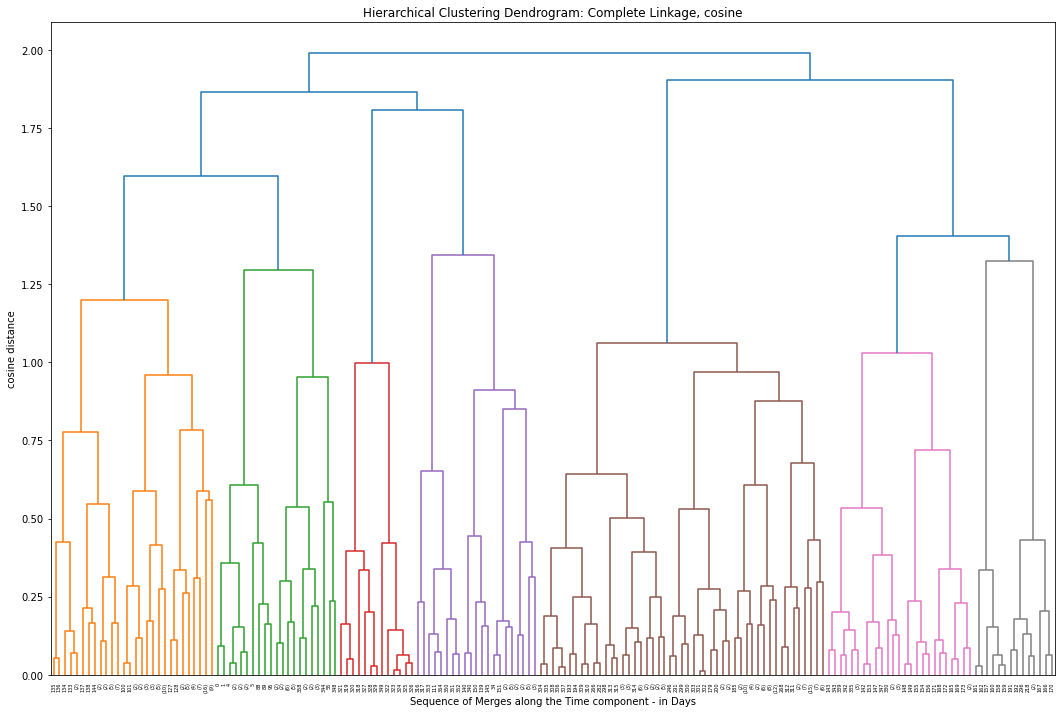

2    356
0      4
3      1
6      1
4      1
5      1
1      1
Name: Cluster, dtype: int64


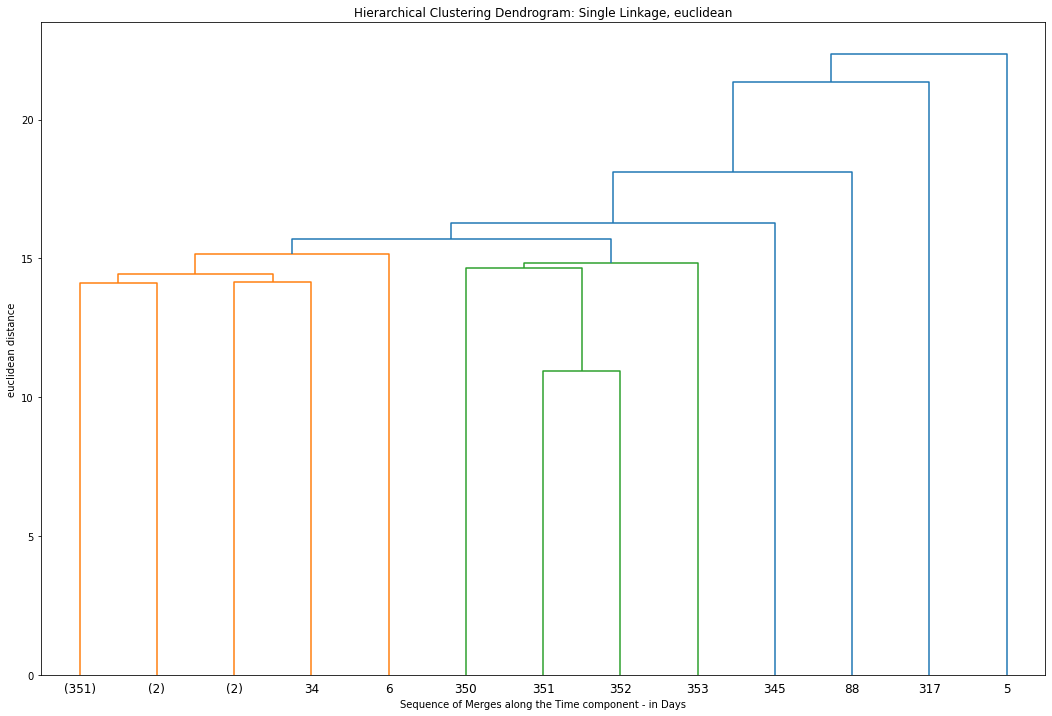

5    186
1    139
0     13
6     12
2      9
3      5
4      1
Name: Cluster, dtype: int64


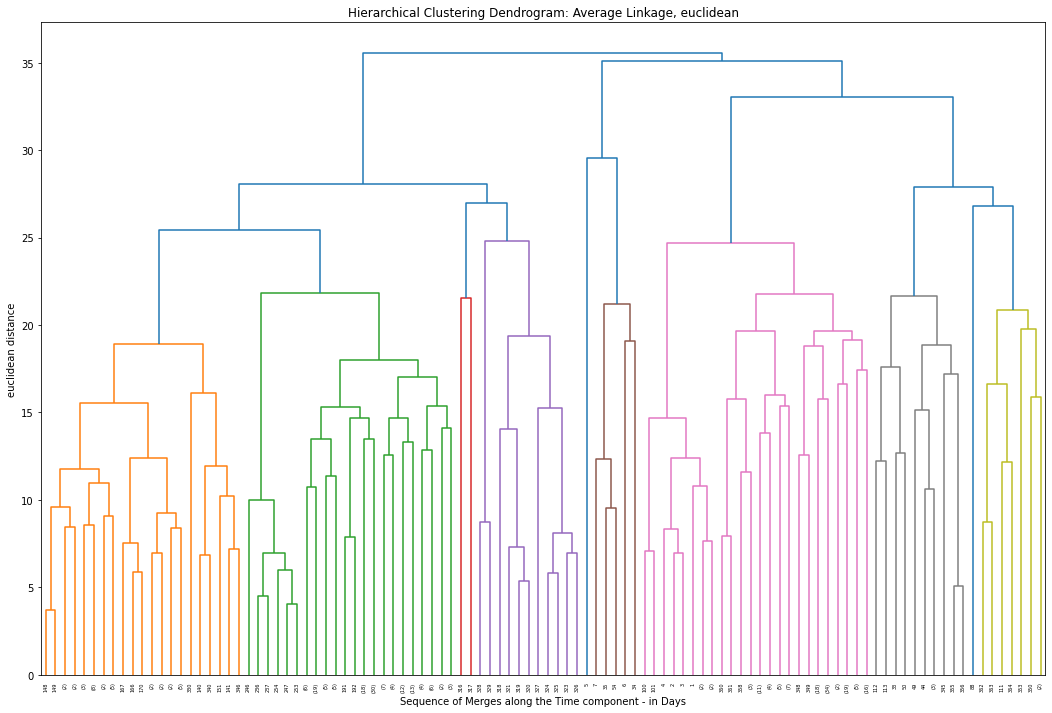

4    142
3     79
2     71
5     42
0     12
6     11
1      8
Name: Cluster, dtype: int64


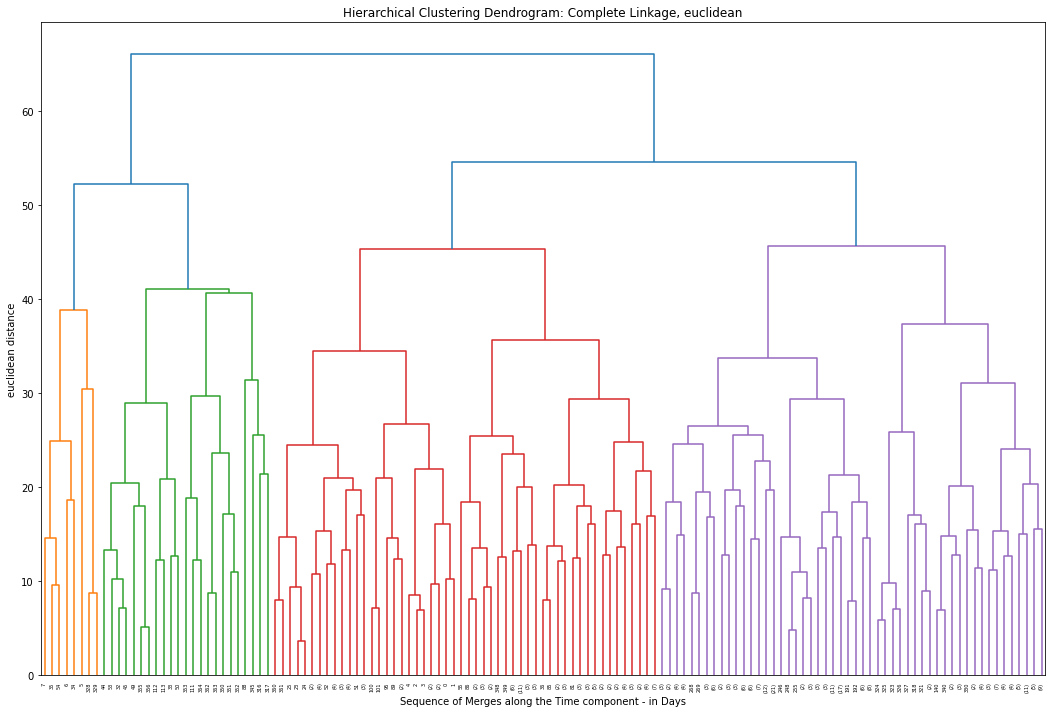

0    104
1    101
4     51
6     42
2     26
5     22
3     19
Name: Cluster, dtype: int64


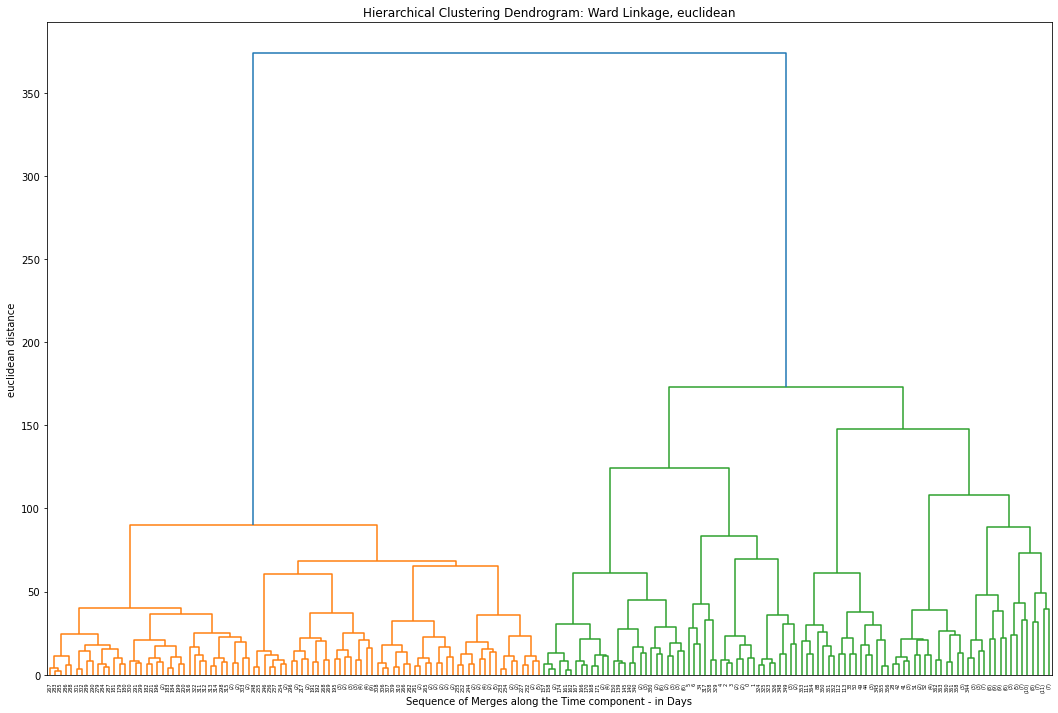

0    356
1      4
5      1
6      1
3      1
4      1
2      1
Name: Cluster, dtype: int64


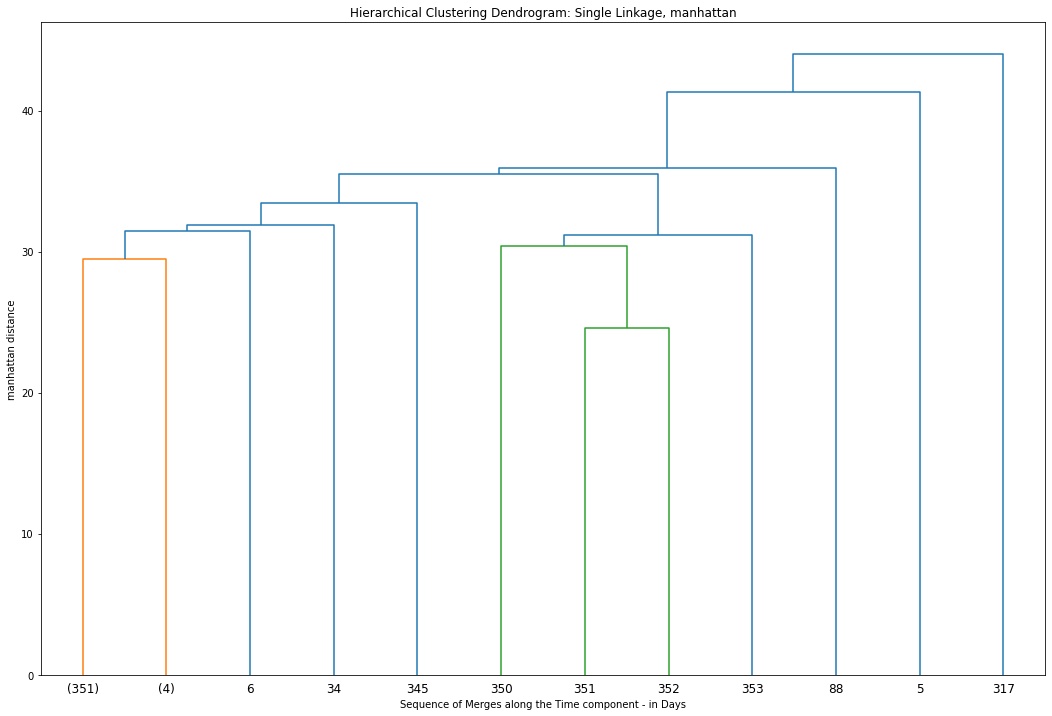

2    178
6    160
3     11
5      8
1      3
4      3
0      2
Name: Cluster, dtype: int64


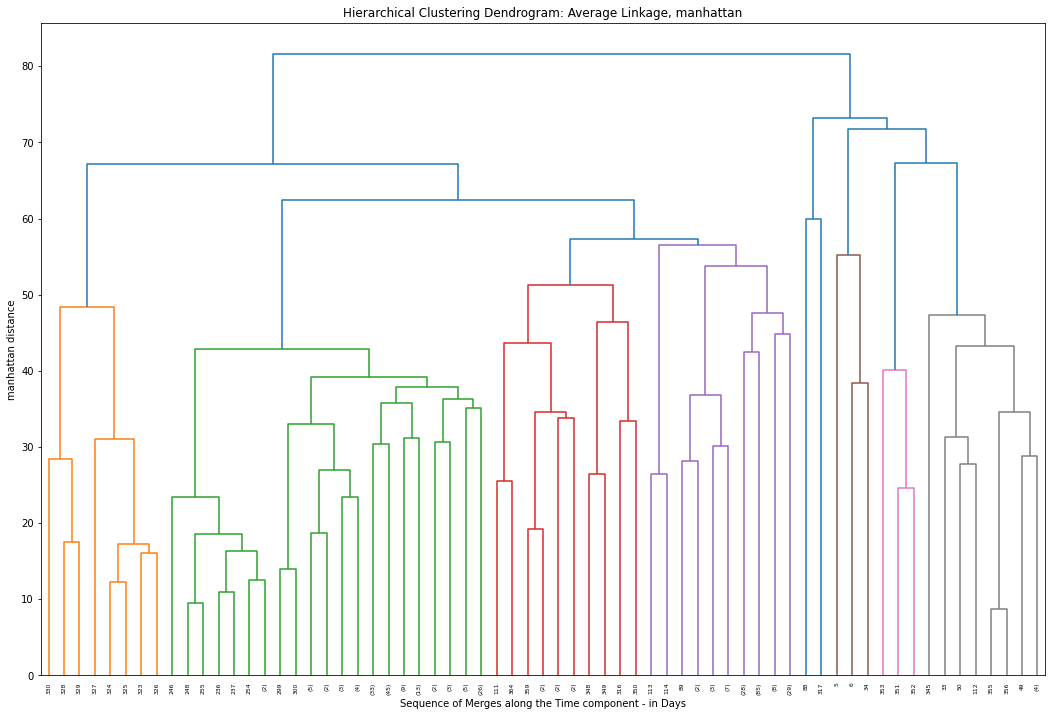

3    160
0     69
2     48
6     39
1     30
5     16
4      3
Name: Cluster, dtype: int64


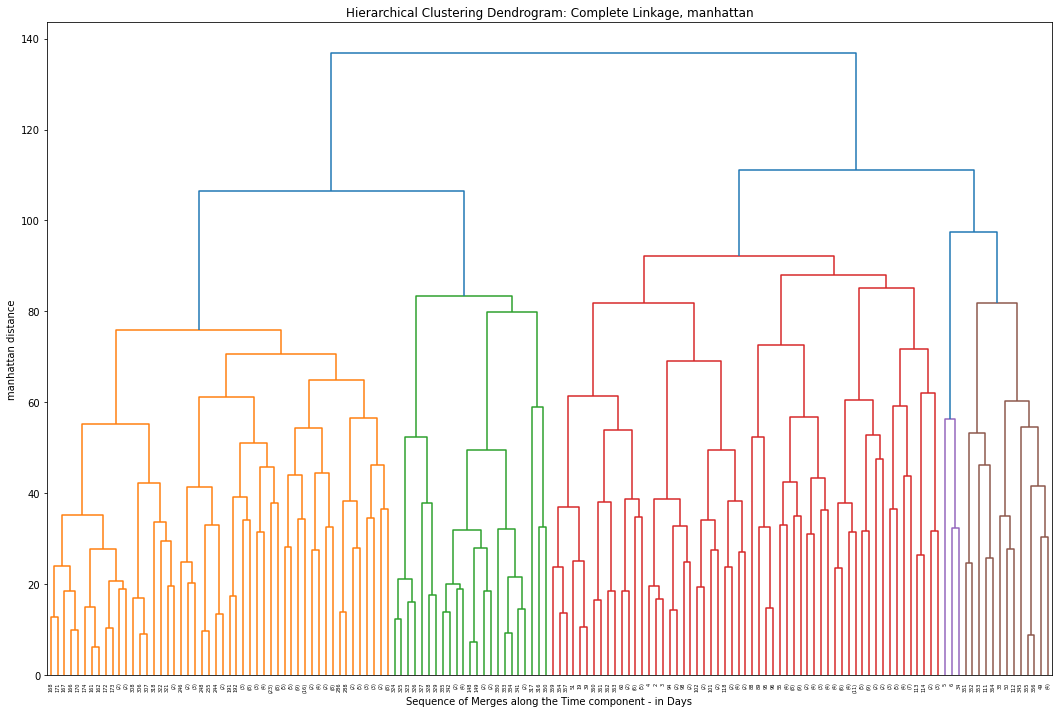

(             0          1      2          3     4     5     6  Cluster
 0    14.330000   5.610000  -5.20  12.190000 -0.83 -4.53  0.69        0
 1    14.960000  -1.520000  -2.36  18.389999  0.19 -4.07 -1.76        0
 2    15.530000  -8.950000   1.69  21.770000 -4.87 -2.27 -1.10        2
 3    16.389999 -10.860000   3.87  17.920000 -7.86 -1.18 -4.86        2
 4    16.730000  -6.240000   7.23  21.990000 -7.49 -5.32 -5.21        2
 ..         ...        ...    ...        ...   ...   ...   ...      ...
 360  10.060000 -20.980000  -2.60  -1.210000  4.15  2.41 -4.87        2
 361  10.800000 -25.950001  -5.39   2.160000  4.05  2.24 -0.61        2
 362  14.400000 -18.950001   8.91   2.610000  4.53  2.37  2.83        2
 363  16.299999 -20.410000  15.44   6.120000  5.51  2.67 -0.93        2
 364  16.660000 -14.680000  22.66  -0.070000  2.30  3.26  1.57        5
 
 [365 rows x 8 columns],
 array([0, 0, 2, 2, 2, 4, 4, 0, 6, 6, 6, 0, 6, 0, 0, 6, 0, 2, 0, 2, 0, 0,
        0, 0, 0, 0, 2, 2, 2, 0, 0, 

In [11]:
st_agglomerative(path2,var, 7, 7, p=7, affinity="euclidean", linkage="average", transformation=True)